In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
tfds.__version__

'2.0.0'

In [25]:
dataset, metadata = tfds.load('mnist', as_supervised=True, with_info=1)

In [26]:
print (dataset), print (metadata)

{'test': <DatasetV1Adapter shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>, 'train': <DatasetV1Adapter shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>}
tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.0,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann. lecun. com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)



(None, None)

In [45]:
train_dataset, test_dataset = dataset['train'], dataset['test']

In [46]:
num_train_ex = metadata.splits['train'].num_examples
num_test_ex = metadata.splits['test'].num_examples

In [47]:
num_train_ex, num_test_ex

(60000, 10000)

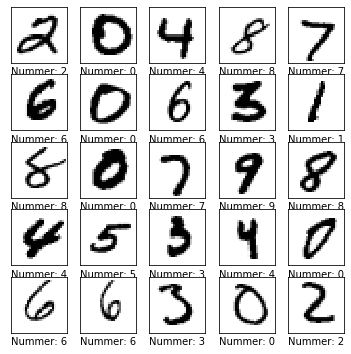

In [48]:
plt.figure(figsize=(6, 6))
i=0
for image, label in test_dataset.take(25):
    image = image.numpy().reshape(28,28)
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(0)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(f'Nummer: {label.numpy()}')
    i+=1
plt.show()

In [49]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax') #multiClass; binary:sigmoid
])

In [50]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [52]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(n_train_ex).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [53]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(n_train_ex/BATCH_SIZE))

Train for 1875 steps
Epoch 1/5
1875/1875 [==============================] - 21s 11ms/step - loss: 2.4214 - accuracy: 0.8590
Epoch 2/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3860 - accuracy: 0.9080
Epoch 3/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2815 - accuracy: 0.9319
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2479 - accuracy: 0.9381
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2201 - accuracy: 0.9456


In [54]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(n_test_ex/BATCH_SIZE))
print (f"TestSet Accuracy: {test_accuracy:.3f}")

313/313 [==============================] - 2s 6ms/step - loss: 0.2342 - accuracy: 0.9471
TestSet Accuracy: 0.947


In [68]:
for img, label in test_dataset.take(1):
    img = img.numpy()
    label = label.numpy()
    predictions = model.predict([img])

In [69]:
predictions.shape

(32, 10)

In [76]:
np.argmax(predictions[0]), np.argmax(predictions[0]), label[0]

(2, 2, 2)

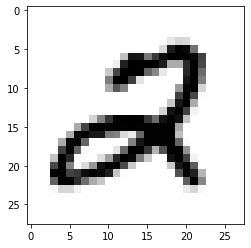

In [84]:
plt.imshow(img[0].reshape(28,28), cmap=plt.cm.binary)

In [111]:
class_names = [x for x in range(0, 10)]

def plot_image(i, predictions_array, true_labels, images):
    predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
    plt.grid(0)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img[..., 0], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label: color='blue'
    else: color='red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(0)
    plt.xticks(class_names)
#     plt.xlabel(class_names)
#     plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1.05])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

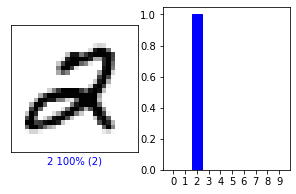

In [112]:
plt.figure(figsize=(5,3))
plt.subplot(1, 2, 1)
plot_image(0, predictions, label, img)
plt.subplot(1, 2, 2)
plot_value_array(0, predictions, label)

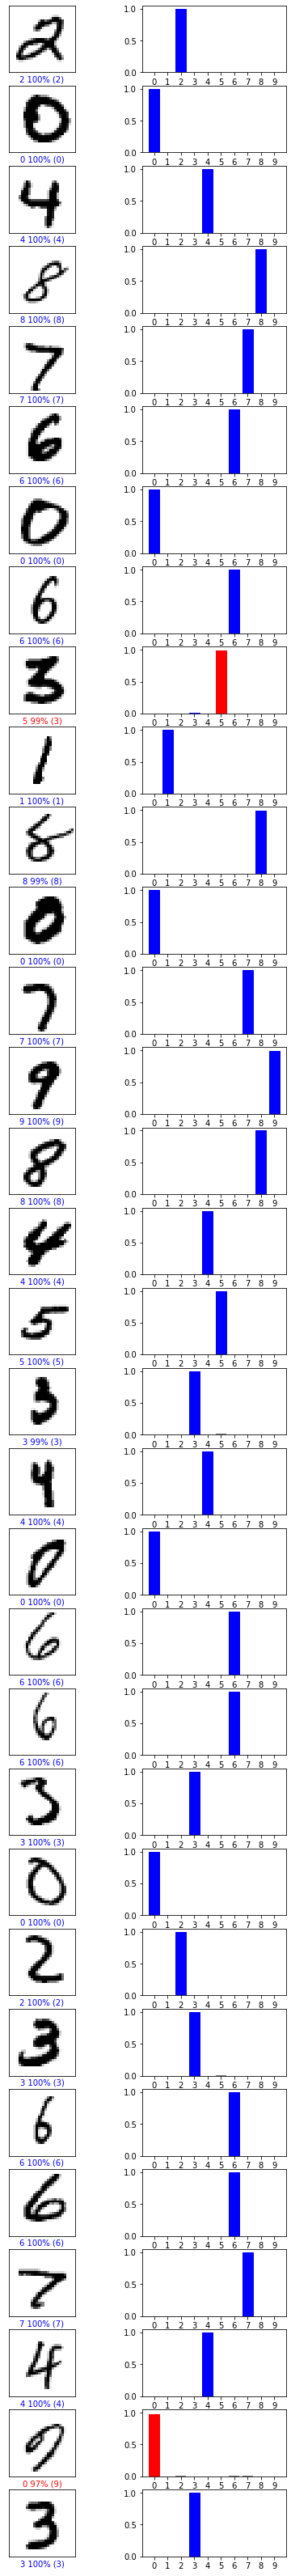

In [126]:
npred = predictions.shape[0]
plt.figure(figsize=(7,math.ceil(npred*1.8)))
i = 1
for n in range(0, predictions.shape[0]):
    
    plt.subplot(npred, 2, i)
    i += 1
    plot_image(n, predictions, label, img)
    plt.subplot(npred, 2, i)
    i += 1
    plot_value_array(n, predictions, label)

In [127]:
plt.show()